## Importing Libraries

  ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [1]:
!pip install -q git+https://github.com/tensorflow/docs

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/tensorflow/docs 'C:\Users\lance\AppData\Local\Temp\pip-req-build-iyssm8ea'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Analysing the dataset

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels) #there are 60,000 labels in the training set

60000

In [8]:
train_labels # Each label is an integer between o and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape #There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels

(10000, 28, 28)

In [10]:
len(test_labels)# And the test set contains 10,000 images labels

10000

In [11]:
len(test_labels)

10000

# Preprocessing the data

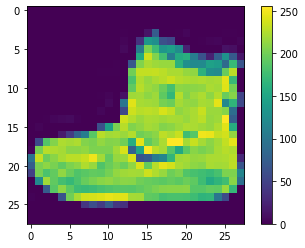

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

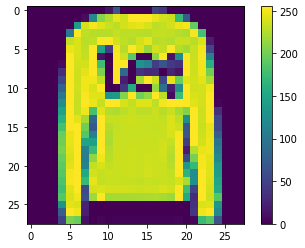

In [13]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

###  Training Set

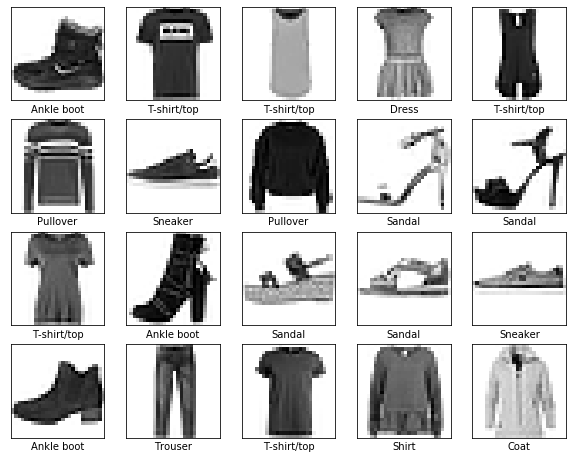

In [15]:

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Test Set

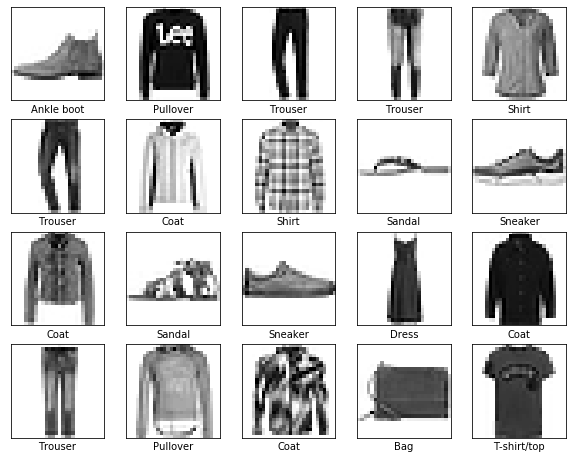

In [16]:

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

# Build the model

In [17]:
cnn = tf.keras.models.Sequential()

In [18]:
cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile The Model

In [19]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

In [26]:
history = cnn.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))


Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1534 - accuracy: 0.9427 - val_loss: 0.3742 - val_accuracy: 0.8839
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9431 - val_loss: 0.4238 - val_accuracy: 0.8806
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1466 - accuracy: 0.9446 - val_loss: 0.3982 - val_accuracy: 0.8872
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1428 - accuracy: 0.9454 - val_loss: 0.3924 - val_accuracy: 0.8866
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1414 - accuracy: 0.9474 - val_loss: 0.3910 - val_accuracy: 0.8902
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1359 - accuracy: 0.9493 - val_loss: 0.4262 - val_accuracy: 0.8863
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1345 - accuracy: 0.9491 - val_loss: 0.4002 - val_accuracy:

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Evaluate accuracy

In [28]:
train_loss, train_acc = cnn.evaluate(train_images,  train_labels, verbose=2)
print('\nTrain accuracy:', train_acc)

1875/1875 - 3s - loss: 0.0966 - accuracy: 0.9637

Train accuracy: 0.9636666774749756


In [29]:
test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5121 - accuracy: 0.8865

Test accuracy: 0.8865000009536743


## Make Prediction On Validation Set

In [30]:
probability_model = tf.keras.Sequential([cnn, tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

In [32]:
predictions[0]
#A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to 
#each of the 10 different articles of clothing.

array([1.4509517e-12, 1.9352931e-29, 1.0216860e-20, 8.2266281e-28,
       7.3709453e-23, 3.2970893e-11, 4.8211259e-17, 9.4932409e-07,
       7.7075432e-18, 9.9999905e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

# Visualization

In [35]:
def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(10))
      plt.yticks([])
      thisplot = plt.bar(range(10), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')

## Verify predictions

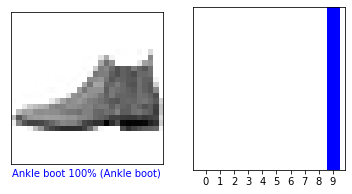

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

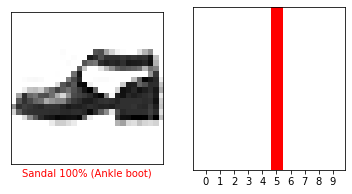

In [37]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

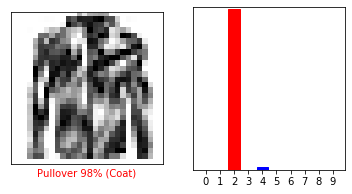

In [38]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

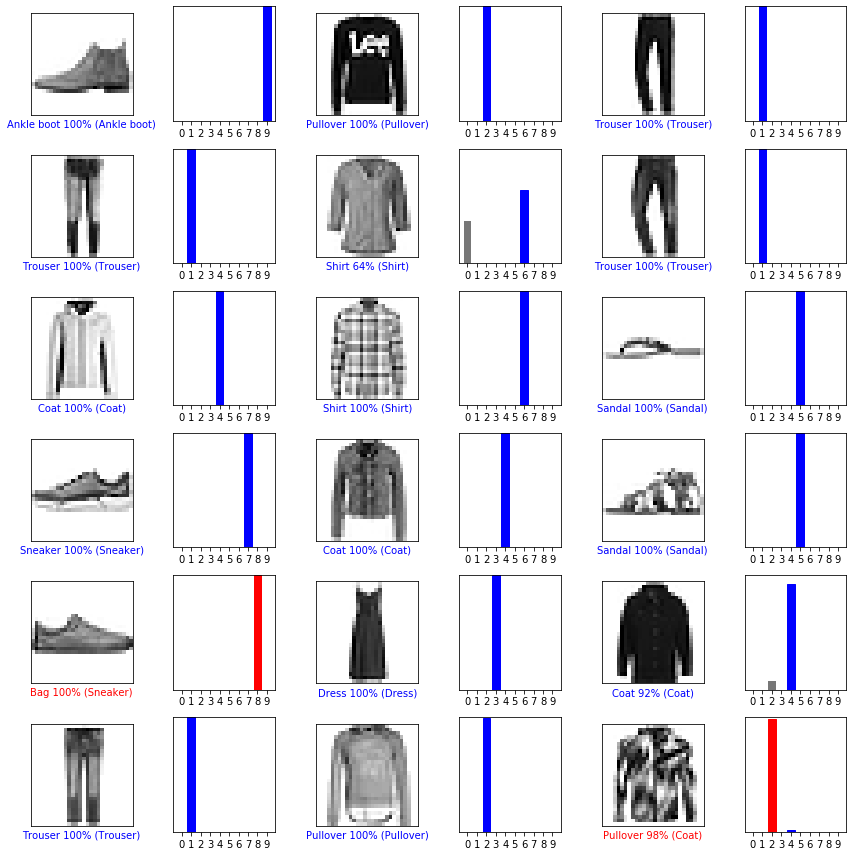

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### use of trained model to make a prediction about a single image.

In [40]:
# Grab an image from the test dataset.
img = test_images[2]
print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.1757878e-20 1.0000000e+00 1.7686245e-22 1.3584234e-21 2.9925528e-22
  1.1865682e-32 4.1136323e-23 4.5696897e-34 7.7265836e-29 1.0149831e-33]]


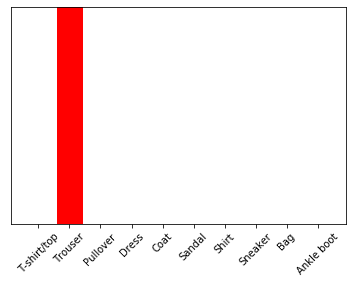

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

1

## Evaluate the model

313/313 - 0s - loss: 0.5121 - accuracy: 0.8865


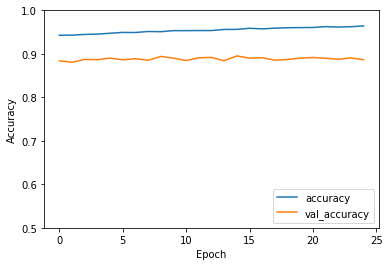

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)